# Loan Default Analysis
This is an EDA project which comprises of 4 parts
 1. Data Understanding
 2. Data Cleansing
 3. Data Analysis
 4. Recommendations

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [51]:
# Set the working directory & Read the data
os.chdir("C:\\Sunder\\DataScience\\MachineLearning\\Projects\\LoanAnalysis")
loan = pd.read_csv("loan.csv", sep = ",", dtype = {"last_pymnt_d":object})
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Understanding

In [9]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


 Data has 111 columns and from the names of the columns, some of the important columns are loan_amnt, term, int_rate, grade, sub_grade.
    
 The **target Variable** is **loan_status**. The idea is to  compare the average default rates across various independent variables 
 and identify the ones that affect default rate the most.   

# Data Cleansing

In [12]:
# Identifying NULL values
loan.isnull().sum()
# Expressing above value as a percentage
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

There are quite a few columns which has 100% missing values and hence these can be removed

In [52]:
# Removing columns wiht 100% NULL values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [53]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


There were 56 columns that had more than 90% missing data and hence removed them

In [45]:
# Checking further for missing data
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [54]:
# Taking a look at the data in the missing columns
loan.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


- **mths_since_last_deling** is the number months passed since the person last fell into the 90 DPD group. 
    Since at the time of loan application, we will not have this data (This gets generated months after the loan 
    has been approved), it cannot be used as a predictor of default at the time of loan approval.
- **desc** contains description contains the comments the applicant had written while applying for the loan. It 
    may contain features such as sentiment, positive/negative words etc, but this will not be used for further analysis    

In [55]:
# Dropping the above two columns
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [18]:
# Check for  columns with missing data
round(loan.isnull().sum()/len(loan.index), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

There are only 3 columns and that too, the percentage is very small. Hence, we can retain those columns

In [21]:
#  Checking for rows with  columns having NULL values
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [20]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [36]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [56]:
# Replace int_rate to numeric
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [57]:
# Extract the numeric part from the variable employment length

# dropping the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['emp_length'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [62]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [59]:
# also, lets extract the numeric part from the variable employment length

# first, let's drop the missing values from the column (otherwise the regex code below throws error)
loan = loan[~loan['term'].isnull()]

# using regular expression to extract numeric values from the string
import re
loan['term'] = loan['term'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['term'] = loan['term'].apply(lambda x: pd.to_numeric(x))

# Data Analysis

The objective of the analysis is to identify those predictor variables that helps in determining 
whether to sanction the loan. Broadly, there are 3 categories of variables
- Variables related to applicant (Age, Occupation, Employment Details,etc)
- Characteristics of the Loan (Loan Amount, Interest Rate, purpose,etc)
- Applicant Behaviours (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc)

For sanctioning of loan, the third category is not required. Hence, we shall be removing those variables for analysis

In [64]:
# Removing behaviour varaibles
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  int64  
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [65]:
# Also, we will not be able to use the variables title, zip code, address, state etc.

df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

Next, from the target variable - loan_status, We need to relabel the values to a binary form - 0 or 1, 
 - 1 indicating that the person has defaulted 
 - 0 otherwise.

In [66]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

"Current" Loan status are not fully paid nor defaults, hence we can remove those rows for our analysis

In [67]:
# Removing rows where loan_status is "Current"
df = df[df['loan_status'] != 'Current']

In [68]:
# Mark Charged Off loan as "1" and Fully paid as "0"
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# Convert to numeric type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
# Summarizing the loan_status data
df['loan_status'].value_counts()


0    32145
1     5399
Name: loan_status, dtype: int64

# Data Analysis

## Univariate Analysis

In [71]:
# Mean of charged off loans
round(np.mean(df['loan_status']), 4)

0.1438

Average default rate is 14.38%

Identify Default Rate across categories

In [92]:
# Define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status',data=df)
    plt.show()

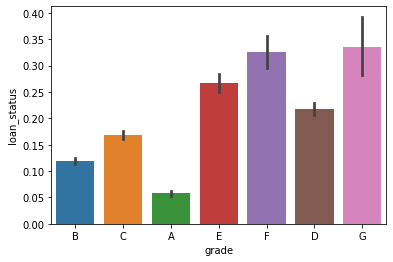

In [93]:
# plotting default rates across grade of the loan
plot_cat("grade")

As the grade of loan goes from A to G, the default rate increases. This is expected 

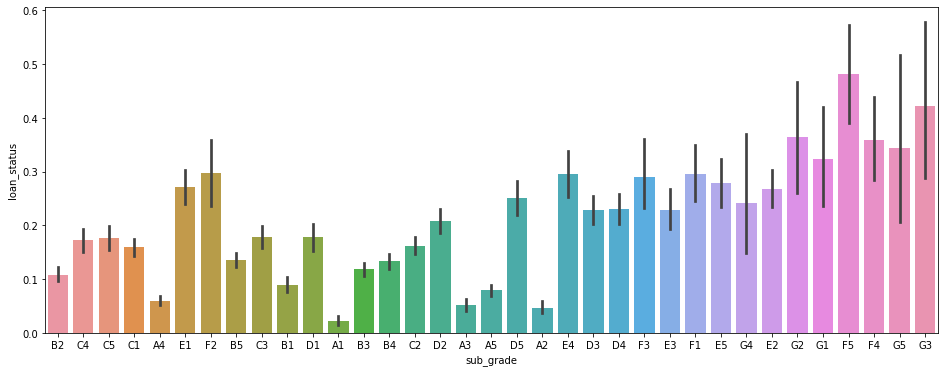

In [94]:
# Plot the subgrade
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

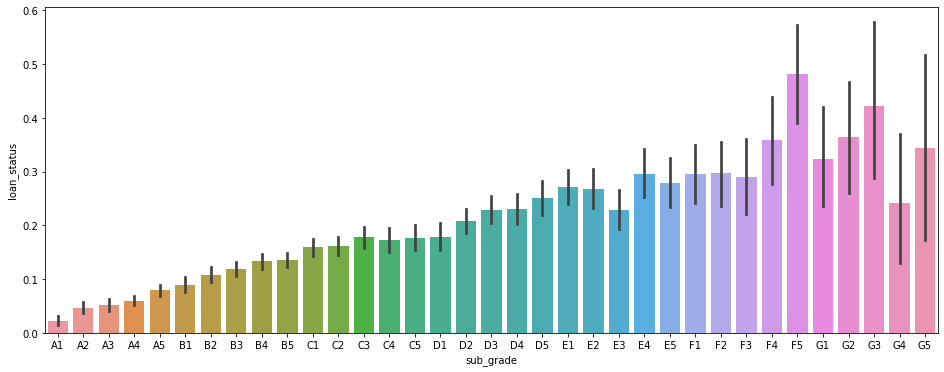

In [88]:
# Plot in ascending order of sub-grades
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=df, order =["A1","A2","A3","A4","A5", 
                                                             "B1","B2","B3","B4","B5",
                                                             "C1","C2","C3","C4","C5",
                                                             "D1","D2","D3","D4","D5",
                                                             "E1","E2","E3","E4","E5",
                                                             "F1","F2","F3","F4","F5",
                                                             "G1","G2","G3","G4","G5"])


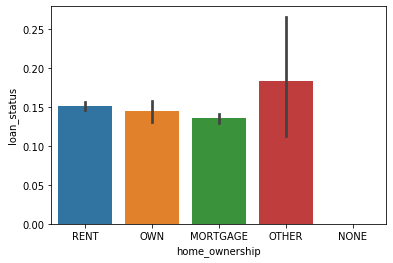

In [95]:
# home ownership: Is it a discriminator?
plot_cat('home_ownership')

Home ownership is not a great discriminator

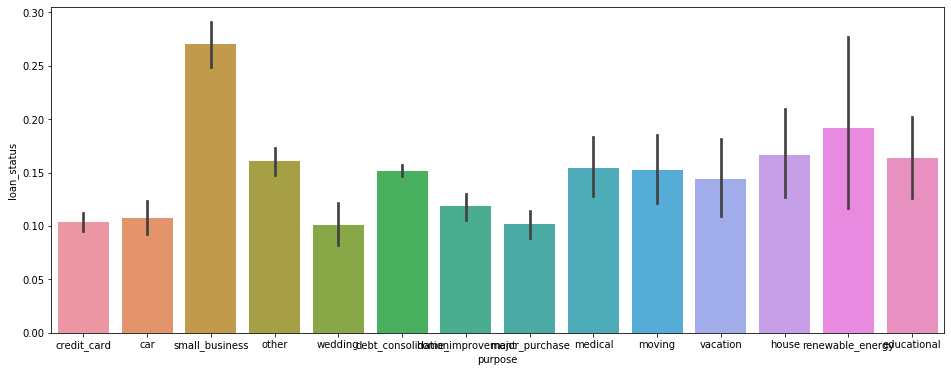

In [96]:
# Purpose of the loan
plt.figure(figsize=(16, 6))
plot_cat('purpose')

From above, the order (top 3) of defaulting of loans based on category is
- Small Business
- Renewable Energy
- House

In [97]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [99]:
# extracting month and year from issue_date
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [100]:
# Loans by year
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [103]:
df.groupby('year').sum()['loan_amnt']

year
2007      2219275
2008     14390275
2009     46436325
2010    119669950
2011    234748300
Name: loan_amnt, dtype: int64

The number of **loans**  and **loan amount** has steadily increased across years

In [104]:
# number of loans across months
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

In [105]:
# amount of loans across months
df.groupby('month').sum()['loan_amnt']

month
1     25022700
2     24655700
3     28916075
4     29823250
5     30739575
6     32664275
7     33902375
8     36321400
9     38356000
10    41918800
11    44968550
12    50175425
Name: loan_amnt, dtype: int64

Most loans are sanctioned in the month of December and the amount is also larger in the month of December

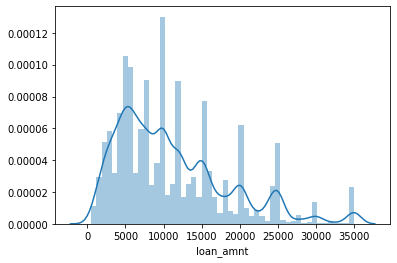

In [106]:
# loan amount plot: 
sns.distplot(df['loan_amnt'])
plt.show()

The median loan amount is around 10,000

We can identify the defaulting of loan amount based on the amount of loan sactioned.
- First we bin the amounts into four categories
- Plot the loan amount

In [107]:
# binning loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt_bin'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

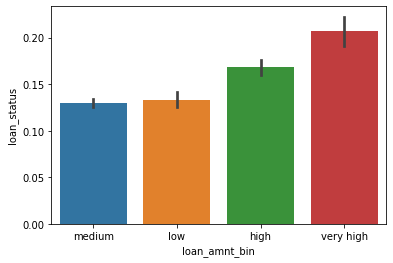

In [109]:
plot_cat('loan_amnt_bin')

In [110]:
df['loan_amnt_bin'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt_bin, dtype: int64

"bin" the interest rates nd plot them to see it's impact on the loan_status

In [111]:
# binning interest_rate
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
df['int_rate_bin'] = df['int_rate'].apply(lambda x: int_rate(x))

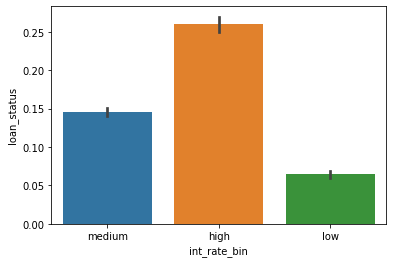

In [112]:
plot_cat('int_rate_bin')

Higher the interest rate, higher is the defaulting

In [ ]:
- Bin the dti (Debt to Income Ratio)
- Plot the binned dti

In [113]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df['dti_bin'] = df['dti'].apply(lambda x: dti(x))

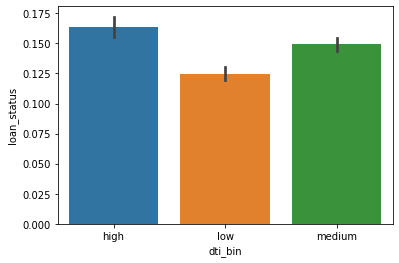

In [114]:
plot_cat('dti_bin')

Higher the debt to income ratio, higher is the defaulting

Binning based on installment amount and plot the samae

In [115]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df['installment_bin'] = df['installment'].apply(lambda x: installment(x))

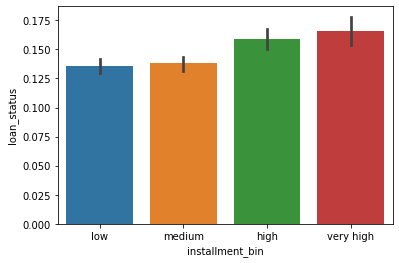

In [116]:
plot_cat('installment_bin')

Higher the installment, higher is the default

Binning the annual income and plot the same

In [118]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df['annual_inc_bin'] = df['annual_inc'].apply(lambda x: annual_income(x))

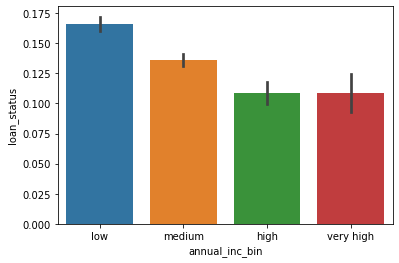

In [119]:
plot_cat('annual_inc_bin')

Binning the emp_length and plot it

In [121]:
# first, let's drop the missing value observations in emp length
df = df[~df['emp_length'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df['emp_length_bin'] = df['emp_length'].apply(lambda x: emp_length(x))

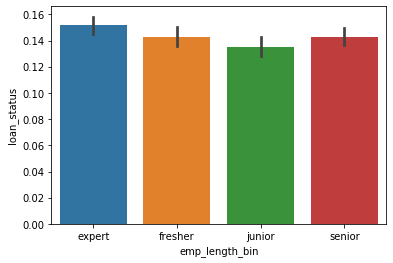

In [122]:
plot_cat('emp_length_bin')

# MultiVariate Analysis

For the multivariate analysis, we will segment the loan applications across the purpose of the loan, 
since that is a variable affecting many other variables - the type of applicant, interest rate, income, 
and finally the default rate

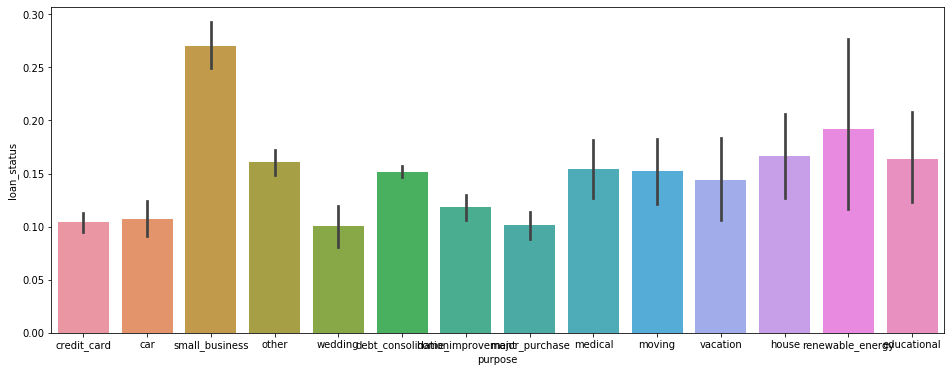

In [123]:
plt.figure(figsize=(16, 6))
plot_cat('purpose')

From the above, we can determine that the top four purposes who default on the loan are
- Small Business
- Renewable Energy
- House
- Educational

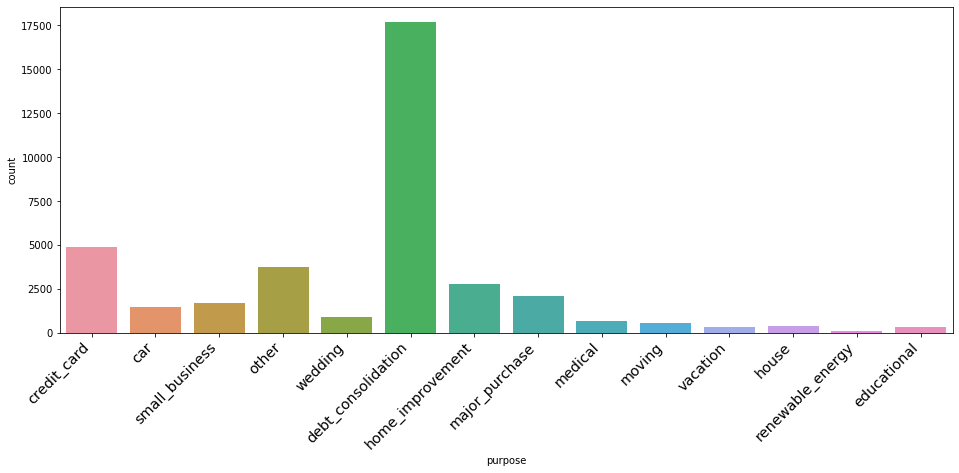

In [130]:
# lets first look at the number of loans for each type (purpose) of the loan
#plt.figure(figsize=(16, 6))
#sns.countplot(x='purpose', data=df)
#plt.show()

#ax = sns.countplot(x="purpose", data=df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.figure(figsize=(16, 6))
#plt.tight_layout()
#plt.show()

plt.figure(figsize=(16,6))
chart = sns.countplot(x="purpose",data=df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
# plt.tight_layout()
plt.show()


In [131]:
# Value Counts based on purpose
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

Among the top 5 purposes choosing the following 4 purposes for the multivariate analysis
- Debt Consolidation
- credit_card
- home_improvement
- major_purchase

In [132]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df4 = df[df['purpose'].isin(main_purposes)]
df4['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

In [135]:
# Create a function which takes a categorical variable and plots the default rate
# segmented by purpose 

def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df4)
    plt.show()

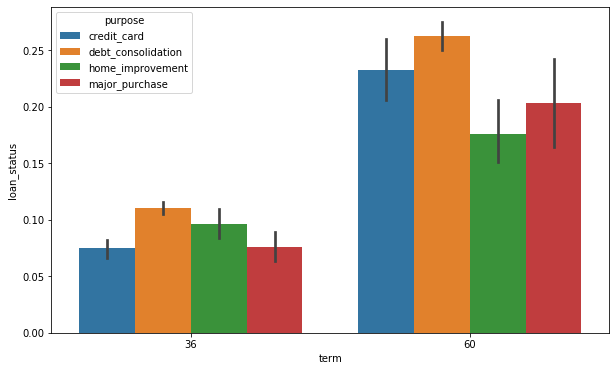

In [136]:
# Plot term
plot_segmented('term')

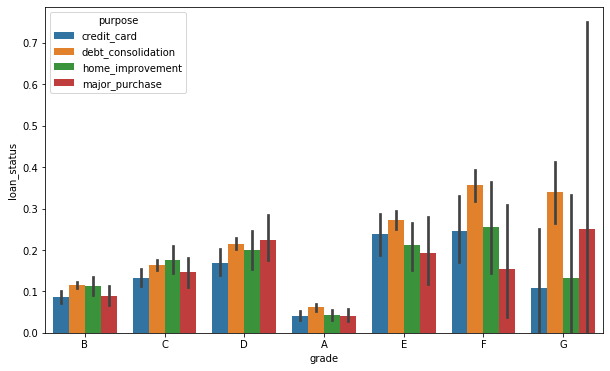

In [137]:
plot_segmented('grade')

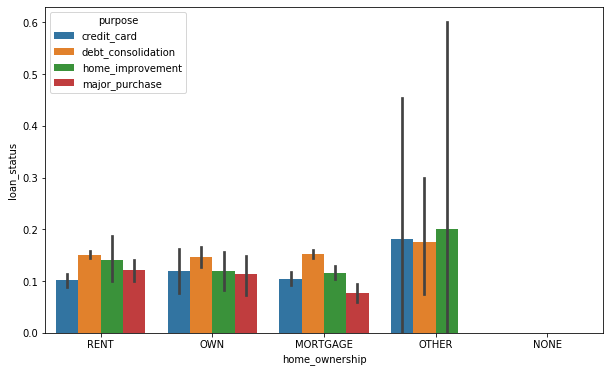

In [138]:
# home ownership
plot_segmented('home_ownership')

We see that debt consolidation is the major reason for default in all the above 

We shall see for 5 more variables (year, loan_amount, int_rate, dti, annual_income)

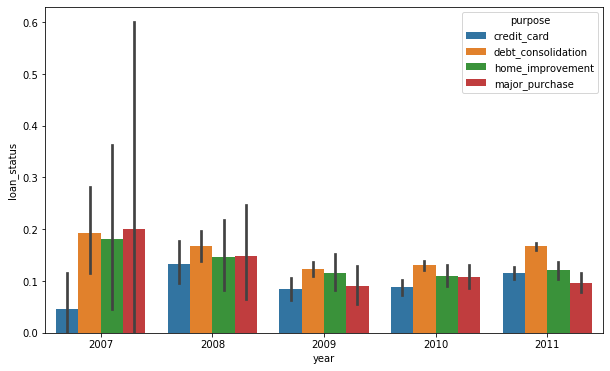

In [140]:
#year
plot_segmented('year')

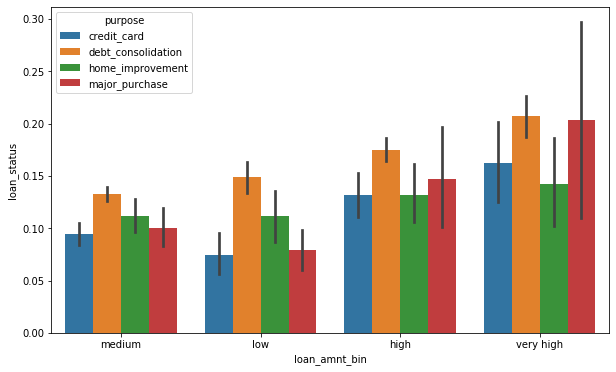

In [143]:
# loan_amount
plot_segmented('loan_amnt_bin')

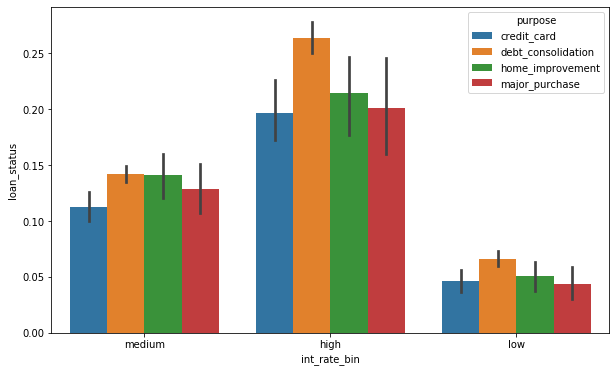

In [144]:
# int_rate
plot_segmented('int_rate_bin')

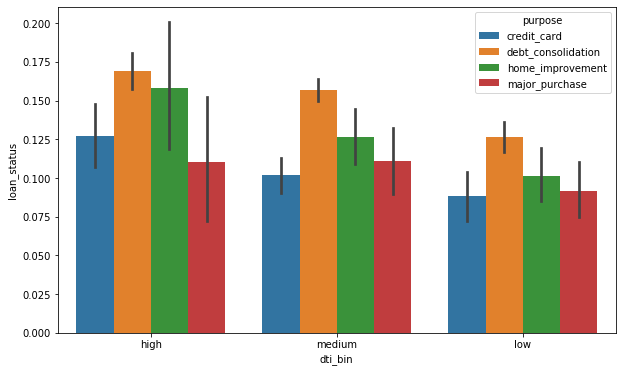

In [145]:
# dti
plot_segmented('dti_bin')

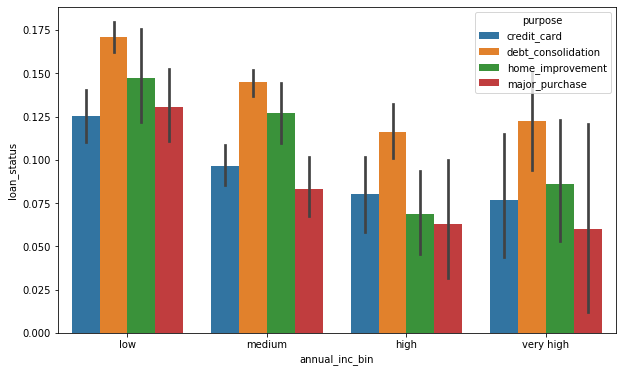

In [147]:
# annual_income
plot_segmented('annual_inc_bin')

Again in all the above 5 variables, debt_consolidation is the major factor for defaulting of loan

In [150]:
# A function which takes in a categorical variable and computes the average 
# default rate across the categories
# It also computes the 'difference between the highest and the lowest default rate' across the 
# categories, which is a metric indicating the effect of the varaible on default rate

def diff_rate(cat_var):
    default_rates = df4.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 4), round(default_rates[0] - default_rates[-1], 4))

In [151]:
default_rates, diff = diff_rate('annual_inc_bin')
print(default_rates) 
print(diff)

annual_inc_bin
low          0.1580
medium       0.1301
very high    0.1016
high         0.0977
Name: loan_status, dtype: float64
0.0602


There is an increase of 6% of loan defaulting rate, as we move from high to low in "annual income"

In [152]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
# storing the diff of default rates for each column
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'grade': 27.37, 'sub_grade': 46.23, 'emp_title': 100.0, 'home_ownership': 15.870000000000001, 'verification_status': 4.16, 'pymnt_plan': 0.0, 'purpose': 5.01, 'initial_list_status': 0.0, 'loan_amnt_bin': 7.359999999999999, 'int_rate_bin': 18.98, 'dti_bin': 4.53, 'installment_bin': 2.7199999999999998, 'annual_inc_bin': 6.02, 'emp_length_bin': 2.12}
